# Topics
## PCA on Handwritten Digits -- Conclusion
## IPython Interactive

In [1]:
%matplotlib inline

''' Initial Imports'''

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# ***use seaborn plotting style defaults
import seaborn as sns; sns.set()


#********************* THE MAIN IMPORT OF THIS LECTURE********************************
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits



''' loading handwritten digits'''
dig_data = load_digits()
X = dig_data.data
# digits: the values of the digits.
digits = dig_data.target

print(type(X), X.dtype, X.shape)
print(type(digits), digits.dtype, digits.shape)


<type 'numpy.ndarray'> float64 (1797, 64)
<type 'numpy.ndarray'> int64 (1797,)


## Make sure everyone has finished last breakout in Lecture 1 of week 15 is finished.

# Classification Scheme

## - The (partial) PCA representation of the image is given by the *n* PCA coefficients.


## - To find out which digit an image represents amounts to finding out which *n*-dimensional cluster does the PCA representation of that image belong.

## - Therefore, one way to classify is to find the *n*-dimensional _average_ distance between the unknown image and the members of the already classified clusters in PCA space, via the Pythagorean Theorem.  

## For example, suppose c0, c1, ..., c\_(n-1) are the *n* PCA coefficients of the unknown image, and c0\_i, c1\_i, ..., c\_(n-1)\_i are the PCA cofficients of the *i*th member of a cluster.

## Then the distance between the unknown image and the *i*th member of a cluster can be calculated as follows

## _d\_i^2_ = (c0 - c0\_i)^2 + (c1 - c1\_i)^2 + ... + (c\_(n-1) - c\_(n-1)\_i)^2


## _Using this metric, the unknown image belongs to the cluster to which it has the lowest average distance._  

#This accomplishes the classification.

## Now let's try this simplest way of classification

In [18]:
'''

Note the first 10 images in the data base are simply the ten digits, 0 to 9.

Let's just use them as a trial.  Starting with zero.

Recall: For Xproj, 0th index selects which image, 1st index selects which PCA component.

'''
# project from 64 to n_comp dimensions
n_comp = 10
pca = PCA(n_comp)  
Xproj = pca.fit_transform(X)



# Select a digit image for recognition
select_idx = 0

idx_compare = digits == 0
#idx_compare = digits == 1

Xproj_compare = Xproj[idx_compare, :]
print("There are {:d} images of the selected digit.".format(Xproj_compare.shape[0]))


# initialize the distance (squared) to be 0
metric = 0.
# Going through all the images of the same digit
for i in range(Xproj_compare.shape[0]):
    # Xproj[select_idx] same as Xproj[select_idx, :] 
    # -- that is, all PCA components are included.
    metric += ( (Xproj[select_idx] - Xproj_compare[i])**2).sum()

# for the "right group"
metric /= (Xproj_compare.shape[0] - 1)

# for the "wrong groups"
#metric /= Xproj_compare.shape[0]

print(metric)

There are 178 images of the selected digit.
270.772288553


In [3]:
#In general the digit that corresponds to an image can be found as follows.

select_idx = 100
# digits is defined in the first cell 
print(digits[select_idx])

4


## Breakout: 

## Turn the above into a function, 

## classify_dig(X, select_idx, n_comp = 10, prn_interm_metric = False)

## where 

## - X is the image data for the digits, 

## - n_comp specifies the number of PCA components, and 

## - select_idx selects one of the 1797 images and therefore can be anything between 0 and 1796.  

## This function should 

## - compare the PCA coefficients of one image, selected by select_idx, with the PCA coefficients of all images in each of the digit groups ("0", "1", ..., "9"); determine to which group the average distance is the lowest; and, finally, prints out the digit that this group belongs to.

## - return k_keep, metric_min, where k_keep is the answer (the digit) found by PCA and metric_min is the minimum distance squared.


## The main program should 

## - call classify_dig(),

## - produce an output that, if prn_interm_metric = True, looks something like this, if the selected image is the first "1":

There are 178 images of the selected digit.

k, metric: 0 , 2857.876035


There are 181 images of the selected digit.

k, metric: 1 , 754.657015021

There are 177 images of the selected digit.

k, metric: 2 , 1571.7009927


There are 183 images of the selected digit.

k, metric: 3 , 1900.62858131


There are 181 images of the selected digit.

k, metric: 4 , 1547.08415651


There are 182 images of the selected digit.

k, metric: 5 , 1923.4742909


There are 181 images of the selected digit.

k, metric: 6 , 1935.79313827


There are 179 images of the selected digit.

k, metric: 7 , 1715.301551


There are 174 images of the selected digit.

k, metric: 8 , 1124.21824358


There are 180 images of the selected digit.

k, metric: 9 , 2080.11842361


Correct Answer: 1

Answer based on PCA space distance: 1 (754.657).

## - display the image that corresponds to select_idx for human verification. 


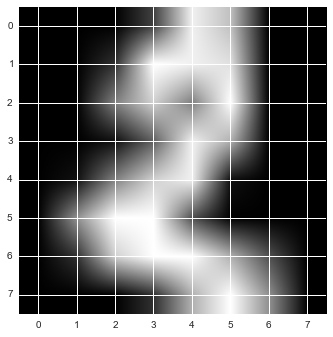

There are 178 images of the selected digit.
There are 182 images of the selected digit.
There are 177 images of the selected digit.
There are 183 images of the selected digit.
There are 181 images of the selected digit.
There are 182 images of the selected digit.
There are 181 images of the selected digit.
There are 179 images of the selected digit.
There are 174 images of the selected digit.
8 1122.26559663


In [41]:
import pdb
def classify_dig(X, select_idx, n_comp = 10, prn_interm_metric = False):
    pca = PCA(n_comp)  
    Xproj = pca.fit_transform(X)
    metric_lst = []
    for n in range(9):
        idx_compare = digits == n
        #idx_compare = digits == 1
        Xproj_compare = Xproj[idx_compare, :]
        #pdb.set_trace()
        if prn_interm_metric:
            print("There are {:d} images of the selected digit.".format(Xproj_compare.shape[0]))

        metric = 0.
        for i in range(Xproj_compare.shape[0]):
            metric += ( (Xproj[select_idx] - Xproj_compare[i])**2).sum()

        metric /= (Xproj_compare.shape[0] - 1)
        metric_lst.append(metric)
    metric_min = min(metric_lst)
    k_keep = metric_lst.index(metric_min)
    #pdb.set_trace()
    
    
    
    return k_keep, metric_min

select_idx = 2
plt.imshow(X[select_idx].reshape((8,8)), cmap = 'gray')
plt.grid('off')
plt.show()

k_keep, metric_min = classify_dig(X, select_idx, prn_interm_metric = True)

           
print(k_keep, metric_min)



## An Aside: IPython Interactive -- Slides

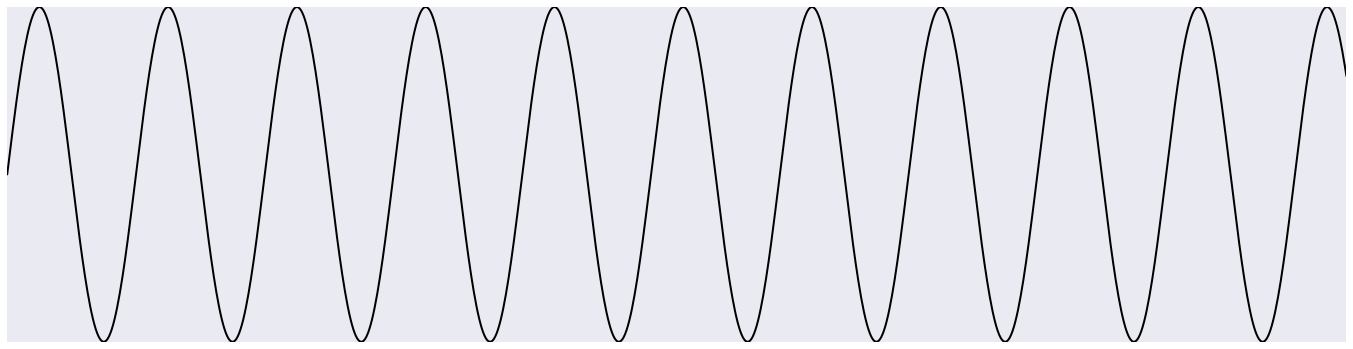

In [42]:
'''Simple slider for sine wave'''
import IPython.html.widgets as widgets
from IPython.display import display

def sine_demo(k=1.):
    x = np.linspace(0, 2*np.pi,1000)
    s = np.sin(k*x) 
    fig = plt.figure(figsize=(24,6))
    ax = fig.add_subplot(111)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.plot(x,s,lw=2,color='black')
    plt.xlim(x.min(), x.max())

k_slider = widgets.FloatSlider(min=0.5, max=100, step=0.1, value=1.)
w=widgets.interactive(sine_demo, k=k_slider)
display(w)

## Breakout: Plot the well-known sigmoid function with two slider for the parameters a and b:

    s = 1/(1+np.exp(-(x-a)/(b+0.1))) # +0.1 to avoid dividing by 0
    
## Plot it and then normalize it to between 0 and 100.  About the parameters a and b,

a: should be between -5 and 5, with a default value of 0 and 

b: should be between -5 and 5, with a default value of 0. 

## Breakout: Digit recognition success rate estimation -- the "leave one out" test.

## Write a program, that 

## - First goes through the first 50 images in the data base and determine by using classify_dig(), the percentage of the images that are correctly identified.

## - Next goes through *all* 1797 images in the data base and determine by using classify_dig(), the percentage of the images that are correctly identified.  This is our "leave-one-out" success rate estimation.

In [48]:
def classify_dig(X, select_idx, n_comp = 10, prn_interm_metric = False):
    pca = PCA(n_comp)  
    Xproj = pca.fit_transform(X)
    metric_lst = []
    for n in range(9):
        idx_compare = digits == n
        #idx_compare = digits == 1
        Xproj_compare = Xproj[idx_compare, :]
        #pdb.set_trace()
        if prn_interm_metric:
            print("There are {:d} images of the selected digit.".format(Xproj_compare.shape[0]))

        metric = 0.
        for i in range(Xproj_compare.shape[0]):
            metric += ( (Xproj[select_idx] - Xproj_compare[i])**2).sum()

        metric /= (Xproj_compare.shape[0] - 1)
        metric_lst.append(metric)
    metric_min = min(metric_lst)
    k_keep = metric_lst.index(metric_min)
    #pdb.set_trace()
    
    
    
    return k_keep, metric_min

# select_idx = 2
# plt.imshow(X[select_idx].reshape((8,8)), cmap = 'gray')
# plt.grid('off')
# plt.show()

# k_keep, metric_min = classify_dig(X, select_idx, prn_interm_metric = True)

           
# print(k_keep, metric_min)
wrong = 0
for ind in range(50):
    dig = classify_dig(X,ind,n_comp=3)
    k_keep = dig[0]
    if digits[ind] != k_keep:
        wrong += 1

success_rate = 1 - wrong/50
print(success_rate)

0.64


## Note: this is unsupervised learning.  
## We can improve by putting in human supervision and correct for individual errors, so that the algorithm can "learn" over time.

## But let's see what went wrong...

(100, 64)


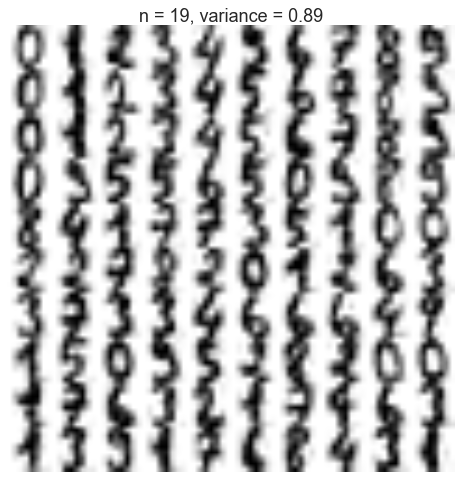

In [80]:
'''
This is a slightly differently of implementing a slider

'''

from IPython.html.widgets import interact

def plot_pca_digits(n_components):

    fig = plt.figure(figsize=(8, 8))
    plt.subplot(1, 1, 1, frameon=False, xticks=[], yticks=[])
    nside = 10
    
    pca = PCA(n_components).fit(X)
    Xproj = pca.inverse_transform(pca.transform(X[:nside ** 2]))
    print(Xproj.shape)
    Xproj = np.reshape(Xproj, (nside, nside, 8, 8))
    total_var = pca.explained_variance_ratio_.sum()

    im = np.vstack([np.hstack([Xproj[i, j] for j in range(nside)])
                    for i in range(nside)])
    plt.imshow(im, cmap = 'binary')
    plt.grid(False)
    plt.title("n = {0}, variance = {1:.2f}".format(n_components, total_var),
                 size=18)
    # Not sure what this line does.
    plt.clim(0, 16)
    
interact(plot_pca_digits, n_components=[1, 64])
plt.show()

## End of Week 15, Lecture 2